This notebook is intended to explore the correlation maps between images and a continious variable (for a categorical, something like t-maps or cohen maps could be computed)

In [1]:
from nilearn import datasets
from nilearn import input_data

dataset = datasets.fetch_development_fmri(n_subjects=1)

dmn_coord = [0, -52, 18]
masker = input_data.NiftiSpheresMasker(
    [tuple(dmn_coord)], 
    radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2)

# Additionally, we pass confound information to ensure our extracted
# signal is cleaned from confounds.

func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

time_series = masker.fit_transform(func_filename,
                                   confounds=confounds_filename)

/home/javi/Documentos/software/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
from cofluctuate_bold_glm import NiftiEdgeSeed

/home/javi/Documentos/software/nilearn/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [3]:
import pandas as pd
import numpy as np
#_cov_conf(foo.brain_ts_conf_, pd.read_csv(confounds_filename, sep="\t").to_numpy())

In [23]:
from cofluctuate_bold_glm import NiftiEdgeSeed
from nilearn.signal import butterworth

foo = NiftiEdgeSeed(seed = tuple(dmn_coord), radius=8, high_pass=0.01, t_r=2, smoothing_fwhm=6.)

foo_img = foo.fit_transform(run_img=func_filename, confounds = confounds_filename)
confounds_filtered = butterworth(pd.read_csv(confounds_filename, sep="\t").to_numpy(),
                                 sampling_rate = 1./2, high_pass=0.01)

_cov_conf(foo.brain_ts_conf_, confounds_filtered)

array([[-5.68547782e-11,  6.62383151e-11,  1.10879481e-13, ...,
         4.65373410e-11,  2.74706450e-10, -9.81992560e-10],
       [-3.02107655e-11,  3.54363398e-11, -2.30591407e-11, ...,
         2.25065292e-11, -3.63117064e-09, -1.63241847e-08],
       [-9.01790416e-11,  4.29505817e-12,  4.11682310e-11, ...,
         7.12941318e-11, -6.03322065e-09, -1.64682035e-08],
       ...,
       [ 1.94146969e-11,  8.23433125e-11, -5.10595571e-11, ...,
        -1.97213373e-11, -3.76421362e-09,  1.29019276e-08],
       [ 1.83049605e-11,  3.28429351e-12,  5.29929654e-11, ...,
        -1.70398721e-11, -8.81288198e-10, -1.67680275e-08],
       [ 3.05177717e-11, -7.04012307e-11,  2.58026677e-11, ...,
        -9.10170347e-12,  8.77931443e-09,  1.71829782e-08]])

In [30]:
brain_masker = input_data.NiftiMasker(smoothing_fwhm=None,
                                      detrend=False, standardize=False, 
                                      high_variance_confounds=False,
                                      low_pass=None, high_pass=None, t_r=2)
foo = brain_masker.fit_transform(func_filename, confounds = confounds_filename)

_cov_conf(foo, pd.read_csv(confounds_filename, sep="\t").to_numpy())

array([[-1.31833217e-01,  3.57833177e-02, -6.39235210e-02, ...,
         1.89258289e-02, -1.09840859e+02, -7.94126709e+01],
       [-1.31833217e-01,  3.57833177e-02, -6.39235210e-02, ...,
         1.89258289e-02, -1.09840859e+02, -7.94126709e+01],
       [-1.31833217e-01,  3.57833177e-02, -6.39235210e-02, ...,
         1.89258289e-02, -1.09840859e+02, -7.94126709e+01],
       ...,
       [ 1.34459312e-01, -3.76139708e-02,  5.61084136e-02, ...,
        -7.12018951e-03,  1.09851361e+02,  7.94153780e+01],
       [ 7.27849408e-14, -1.26153424e-14,  4.67213312e-14, ...,
        -1.07562951e-14,  3.31290627e-11,  2.44734909e-11],
       [ 1.34459312e-01, -3.76139708e-02,  5.61084136e-02, ...,
        -7.12018951e-03,  1.09851361e+02,  7.94153780e+01]])

In [106]:
from nilearn.signal import butterworth
#foo = brain_masker.fit_transform(func_filename, confounds=confounds_filename)

confounds_filtered = butterworth(pd.read_csv(confounds_filename, sep="\t").to_numpy(),
                                 sampling_rate = 1./2, high_pass=0.01)
_cov_conf(foo, confounds_filtered)



array([[-3.03320907e-10,  5.94902506e-10, -3.39420134e-11, ...,
         4.21874521e-10,  2.07992221e-08, -3.22934271e-08],
       [-3.03320907e-10,  5.94902506e-10, -3.39420134e-11, ...,
         4.21874521e-10,  2.07992221e-08, -3.22934271e-08],
       [-3.03320907e-10,  5.94902506e-10, -3.39420134e-11, ...,
         4.21874521e-10,  2.07992221e-08, -3.22934271e-08],
       ...,
       [ 7.82939712e-11, -6.76799734e-10,  1.39217189e-10, ...,
        -1.71479917e-10, -1.73748580e-08, -8.27572645e-08],
       [ 2.54107436e-11,  6.91598247e-12,  5.04983149e-11, ...,
        -2.29294049e-11, -1.14995377e-09, -1.57263318e-08],
       [ 7.82939712e-11, -6.76799734e-10,  1.39217189e-10, ...,
        -1.71479917e-10, -1.73748580e-08, -8.27572645e-08]])

In [5]:
from nilearn.masking import apply_mask

X = apply_mask("../data/preproc_bold/task-msit/sub-1002_ses-01_task-msit_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz",
               mask_img="../data/masks/grey_mask_motion_035.nii.gz")
conf = pd.read_csv("../data/confounders/task-msit/sub-1002_ses-01_task-msit_desc-confounds_regressors.tsv", sep="\t").filter(regex="trans|rot").fillna(0).to_numpy()

X_w_std = clean(X, detrend=False, standardize=False, standardize_confounds=True, confounds=conf)

nifti_masker = NiftiMasker(mask_img="../data/masks/grey_mask_motion_035.nii.gz")
X_w_std_2  = nifti_masker.fit_transform("../data/preproc_bold/task-msit/sub-1002_ses-01_task-msit_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz",
                          confounds = conf)



NameError: name 'clean' is not defined

In [6]:
foo = NiftiEdgeSeed(seed = tuple(dmn_coord), radius=8, high_pass=None, t_r=2, smoothing_fwhm=None, 
                    mask_img="../data/masks/grey_mask_motion_035.nii.gz")

foo_img = foo.fit_transform(run_img="../data/preproc_bold/task-msit/sub-1002_ses-01_task-msit_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz", 
                            confounds = conf)

In [11]:
foo_img.shape

(61, 73, 65, 280)

In [13]:
_cov_conf(foo.brain_ts_conf_, conf)

array([[-5.22680650e-13, -7.88300403e-14,  1.63849200e-12, ...,
         3.20537618e-13,  1.16878706e-12,  7.14776006e-13],
       [-8.51457617e-13, -2.64290262e-13,  1.14439152e-12, ...,
         2.42024883e-13,  1.31499004e-12,  7.07978092e-13],
       [-7.12668312e-13,  7.59180814e-14,  1.23376410e-12, ...,
         1.24930274e-13,  1.28747960e-12,  4.29772656e-13],
       ...,
       [-3.76388049e-13, -1.11914712e-13,  4.62686133e-13, ...,
         4.48055560e-14,  5.60155227e-13,  2.19359261e-13],
       [-1.18507671e-13, -2.62515831e-14,  2.98366795e-13, ...,
         5.41613361e-14,  2.60141850e-13,  1.17204560e-13],
       [-1.02459473e-12, -3.97559914e-14,  1.84948028e-12, ...,
         2.46652095e-13,  1.78523965e-12,  7.17819993e-13]])

In [37]:
_cov_conf(X_w_std, conf.to_numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

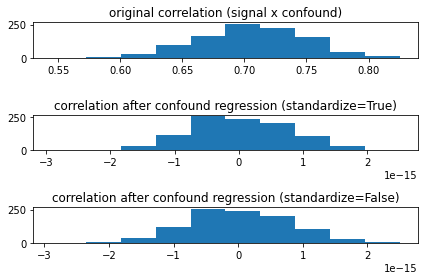

In [26]:
import numpy as np
from nilearn.signal import clean
import matplotlib.pyplot as plt

r=[]
r_w_std=[]
r_no_std=[]
for i in range(1000):
    X=np.random.rand(100,1)
    c = X + np.random.rand(100,1)
    X_w_std = clean(X, detrend=False, standardize=True, standardize_confounds=True, confounds=c)
    # Use standardize_confounds=False to get previous behaviour...
    X_no_std = clean(X, detrend=False, standardize=False, standardize_confounds=True, confounds=c)                                

    r.append(np.corrcoef(X.T,c.T)[1,0])
    r_w_std.append(np.corrcoef(X_w_std.T,c.T)[1,0])
    r_no_std.append(np.corrcoef(X_no_std.T,c.T)[1,0])

f, (ax1, ax2,ax3) = plt.subplots(3)
ax1.hist(r)
ax1.set_title('original correlation (signal x confound)')
ax2.hist(r_w_std)
ax2.set_title('correlation after confound regression (standardize=True)')
ax3.hist(r_no_std)
ax3.set_title('correlation after confound regression (standardize=False)')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
def _cov_conf(tseries, conf):
    conf_n = StandardScaler().fit_transform(conf)
    tseries_n = StandardScaler().fit_transform(tseries)
    cov_mat = np.matmul(tseries_n.transpose(), conf_n)
    return cov_mat

#_cov_conf(foo, pd.read_csv(confounds_filename, sep="\t").to_numpy())

In [22]:
import pandas as pd
import numpy as np
np.corrcoef(foo.brain_ts_conf_[:,0], pd.read_csv(confounds_filename, sep="\t").to_numpy()[:,10])

/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [90]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from nibabel import Nifti1Image
from nilearn.input_data import NiftiMasker

epsilon = 10e-10


def _simu_img():
    # Random confounds
    conf = 2 + np.random.randn(100, 6)

    # Random 4D volume
    vol = 100 + 10 * np.random.randn(5, 5, 2, 100)
    img = Nifti1Image(vol, np.eye(4))

    # create an nifti image with the data, and corresponding mask
    mask = Nifti1Image(np.ones([5, 5, 2]), np.eye(4))

    return img, mask, conf


def _cov_conf(tseries, conf):
    conf_n = StandardScaler().fit_transform(conf)
    tseries_n = StandardScaler().fit_transform(tseries)
    cov_mat = np.matmul(tseries_n.transpose(), conf_n)
    return cov_mat


def _confounds_regression(standardize=True, demean=True):
    img, mask, conf = _simu_img()
    masker = NiftiMasker(standardize=standardize, mask_img=mask).fit()
    if demean:
        conf = StandardScaler(with_std=False).fit_transform(conf)
    tseries = masker.transform(img, confounds=conf)
    cov_mat = _cov_conf(tseries, conf)
    return np.sum(np.abs(cov_mat))


def test_no_standardize_demean():
    assert _confounds_regression(standardize=False, demean=True) < epsilon


def test_zscore_demean():
    assert _confounds_regression(standardize="zscore", demean=True) < epsilon


def test_psc_demean():
    assert _confounds_regression(standardize="psc", demean=True) < epsilon


def test_no_standardize_no_demean():
    assert _confounds_regression(standardize=False, demean=False) < epsilon


def test_zscore_nodemean():
    assert _confounds_regression(standardize="zscore", demean=False) < epsilon


def test_psc_nodemean():
    assert _confounds_regression(standardize="psc", demean=False) < epsilon

In [91]:
_confounds_regression(standardize=False, demean=False)

6.799780167428761e-11

In [55]:
test_no_standardize_demean()
test_zscore_demean()
test_no_standardize_no_demean()

In [55]:
def create_edge_mask_from_atlas(atlas_file):
    # Create a mask for the upper triangular only
    from nilearn import image
    
    atlas_img = image.load_img(atlas_file)
    n_parcels = int(len(np.unique(atlas_img.get_fdata()))-1) # to discard background 0
    
    mask_data = np.zeros(shape=(n_parcels, n_parcels), dtype=int)
    mask_data[np.triu_indices_from(mask_data, k=1)]=1
    mask_data = mask_data[:,:,None]
    mask_img = image.new_img_like(ref_niimg = atlas_img, 
                                  data = mask_data, 
                                  affine = np.eye(4))
    
    return mask_img
    

In [3]:

seed = (-42.04899883270264, 5.229002952575684, 29.5)
radius = 8.0
mask_img = "../data/masks/grey_mask_motion_035.nii.gz"
smoothing_fwhm = 6.0
edge_atlas =   NiftiEdgeSeed(seed = seed,
                             radius = radius,
                             mask_img = mask_img,
                             smoothing_fwhm = smoothing_fwhm,
                             high_pass = 1/187.,
                             t_r = 2.0,
                             fir_delays = list(range(10))
                             )
#edge_ts_img = edge_atlas.fit_transform(run_img = run_img, events = event_file, confounds = confounds)


NameError: name 'NiftiEdgeSeed' is not defined

In [224]:
import numpy as np
from numpy import column_stack as cstack
from collections import namedtuple
from joblib import delayed, Parallel


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from nilearn.image import new_img_like


class BasePredictiveMaps():
        
    def fit(self, X, y):
        return
     
    def fit_predict(self, X, y):
        return
    
    def fit_predict(self, X):
        return
    
    def _check_inputs(self, X, y):
        
        from nibabel.nifti1 import Nifti1Image
        from nilearn.image import load_img, concat_imgs
        
        if type(X)==list:
            # First, load images
            X = [load_img(img) for img in X]
            
            # check that all elements of the list have dimension 3 (should be 3D images)
            dims_X = [img.ndim!=3 for img in X]
            if np.any(dims_X):
                raise print("List of images provided, so they all should be 3D")
                
            X = concat_imgs(X)
        
        elif type(X) == Nifti1Image:
            if X.ndim!=4:
                raise print("One Nifti image, so it should be 4D")
            
            n_obs = X.shape[3]
            
            if n_obs < 3:
                print("check the results, with observations < 3 the correlations"
                     " will NaN or always 1")
        
        y = np.asarray(y)
        
        if y.ndim > 1:
            raise print("Dependent variable y should be unidimensional")
        
        return X, y

    
class RegressionMaps(BasePredictiveMaps):

    def __init__(self, n_splits=5, n_jobs=1, random_state=None):
        self.n_splits = n_splits
        self.n_jobs = n_jobs
        self.random_state = random_state

    def fit(self, X, y):
        
        #from tqdm import tqdm

        X, y = self._check_inputs(X, y)
        
        X_data = X.get_fdata()
        
        mask = np.ones(X.shape[:3], dtype=bool)
        
        X_masked = X_data[mask].T # Time Points x Voxels
        n_tps, n_voxels = X_masked.shape

        cv = KFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        linReg = LinearRegression()
        
        y_pred_voxels = []
        y_true = []
        #TODO: Parallelise this. It's very simple
        
        for train_index, test_index in tqdm(cv.split(X_masked,y)):
            X_train, X_test = X_masked[train_index], X_masked[test_index]
            y_train, y_test = y[train_index], y[test_index]

            linReg.fit(y_train[:, None], X_train)
            
            beta_y_on_x = np.squeeze(linReg.coef_.T)
            mu_x = np.mean(X_train, axis=0)
            mu_y = np.mean(y_train)
            var_x = np.var(X_train, axis=0)
            var_y = np.var(y_train)
            
            mask_nan = (var_x!=0.)
            
            beta = (var_y*beta_y_on_x[mask_nan])/var_x[mask_nan]
            alpha = mu_y - (mu_x[mask_nan]*beta_y_on_x[mask_nan]/var_x[mask_nan])*var_y
            
            y_pred_fold = np.zeros((len(y_test), n_voxels))
            
            def func_pred(a, alpha, beta):
                pred = alpha + a*beta
                return pred
            
            y_pred_fold[:, mask_nan] = cstack([func_pred(x, a, b) \
                                               for (x,a,b) in zip(X_test[:, mask_nan].T, alpha, beta)])

            y_pred_voxels.append(y_pred_fold)
            y_true.append(y_test)

        y_pred_voxels = np.row_stack(y_pred_voxels)
        y_true = np.concatenate(y_true)
        
        self.y_pred_voxels_ = y_pred_voxels
        
        # Compute correlation and R2 maps
        corr_voxels = np.zeros(n_voxels)
        r2_voxels = np.zeros(n_voxels)
        
        # Do not use voxels with no predictions at all
        mask_zeros = ~np.all(y_pred_voxels==0, axis=0)
        
        def func_r2(a, y_true):
            return r2_score(y_true, a)
        def func_cor(a, y_true):
            return np.corrcoef(a,y_true)[0,1]

        r2_voxels[mask_zeros] = np.apply_along_axis(func_r2, 0, y_pred_voxels[:,mask_zeros], y_true)
        # Set negative r2 values to zero, as they are not predictive
        r2_voxels[r2_voxels<0]=0
        
        corr_voxels[mask_zeros] = np.apply_along_axis(func_cor, 0, y_pred_voxels[:,mask_zeros], y_true)
        corr_voxels[corr_voxels<0]=0 # Should I do this as well?
        
        # return both predictive measures as images
        r2_image_data = np.zeros(X.shape[:3])
        r2_image_data[mask] = r2_voxels    
        self.r2_image_ = new_img_like(X, r2_image_data)

        corss_image_data = np.zeros(X.shape[:3])
        corss_image_data[mask] = corr_voxels    
        self.corrs_image_ = new_img_like(X, corss_image_data)
        
        return self

    def fit_predict(self, X, y):
                
        self.fit(X, y)
        reg_maps_results = namedtuple("RegressionMaps", ["R2_maps", "Corr_maps"])
        
        return reg_maps_results(R2_maps=self.r2_image_, Corr_maps=self.corrs_image_)
    
    def predict(self, X):
        
        from sklearn.utils.validation import check_is_fitted
        check_is_fitted(self)

        reg_maps_results = namedtuple("RegressionMaps", ["R2_maps", "Corr_maps"])
        
        return reg_maps_results(R2_maps=self.r2_image_, Corr_maps=self.corrs_image_)
    
def _inverse_reg_cv(estimator, X, y, train_index, test_index):
    """
    Function to predict in a fold, fitting first
    
    """
    X_train, X_test = X[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator.fit(y_train[:, None], X_train)

    beta_y_on_x = np.squeeze(estimator.coef_.T)
    mu_x = np.mean(X_train, axis=0)
    mu_y = np.mean(y_train)
    var_x = np.var(X_train, axis=0)
    var_y = np.var(y_train)

    mask_nan = (var_x!=0.)

    beta = (var_y*beta_y_on_x[mask_nan])/var_x[mask_nan]
    alpha = mu_y - (mu_x[mask_nan]*beta_y_on_x[mask_nan]/var_x[mask_nan])*var_y

    y_pred_fold = np.zeros((len(y_test), n_voxels))

    def func_pred(a, alpha, beta):
        pred = alpha + a*beta
        return pred

    y_pred_fold[:, mask_nan] = cstack([func_pred(x, a, b) \
                                       for (x,a,b) in zip(X_test[:, mask_nan].T, alpha, beta)])
    
    return y_pred_fold, y_true_fold


In [249]:
import numpy as np
from numpy import column_stack as cstack
from collections import namedtuple
from joblib import Parallel, delayed

from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from nilearn.image import new_img_like


class BasePredictiveMaps():
        
    def fit(self, X, y):
        return
     
    def fit_predict(self, X, y):
        return
    
    def fit_predict(self, X):
        return
    
    def _check_inputs(self, X, y):
        
        from nibabel.nifti1 import Nifti1Image
        from nilearn.image import load_img, concat_imgs
        
        if type(X)==list:
            # First, load images
            X = [load_img(img) for img in X]
            
            # check that all elements of the list have dimension 3 (should be 3D images)
            dims_X = [img.ndim!=3 for img in X]
            if np.any(dims_X):
                raise print("List of images provided, so they all should be 3D")
                
            X = concat_imgs(X)
        
        elif type(X) == Nifti1Image:
            if X.ndim!=4:
                raise print("One Nifti image, so it should be 4D")
            
            n_obs = X.shape[3]
            
            if n_obs < 3:
                print("check the results, with observations < 3 the correlations"
                     " will NaN or always 1")
        
        y = np.asarray(y)
        
        if y.ndim > 1:
            raise print("Dependent variable y should be unidimensional")
        
        return X, y

    
class RegressionMaps(BasePredictiveMaps):

    def __init__(self, n_splits=5, n_jobs=1, random_state=None, verbose=0):
        self.n_splits = n_splits
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.verbose = verbose

    def fit(self, X, y):
        
        #from tqdm import tqdm

        X, y = self._check_inputs(X, y)
        
        X_data = X.get_fdata()
        
        mask = np.ones(X.shape[:3], dtype=bool)
        
        X_masked = X_data[mask].T # Time Points x Voxels
        n_voxels = X_masked.shape[1]

        cv = KFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        linReg = LinearRegression()
        
        parallel = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)

        results = parallel(delayed(_inverse_reg_cv)(clone(linReg), 
                                                    X_masked, y, train_index, test_index) 
                           for (train_index, test_index) in cv.split(X_masked,y))
        
        y_pred_voxels, y_true = zip(*results) # Extract multiple returns from the parallel function
        y_pred_voxels = np.row_stack(y_pred_voxels)
        y_true = np.concatenate(y_true)
        
        # Compute correlation and R2 maps
        corr_voxels = np.zeros(n_voxels)
        r2_voxels = np.zeros(n_voxels)
        
        # Do not use voxels with no predictions at all
        mask_zeros = ~np.all(y_pred_voxels==0, axis=0)
        
        def func_r2(a, y_true):
            return r2_score(y_true, a)
        def func_cor(a, y_true):
            return np.corrcoef(a,y_true)[0,1]

        r2_voxels[mask_zeros] = np.apply_along_axis(func_r2, 0, y_pred_voxels[:,mask_zeros], y_true)
        # Set negative r2 values to zero, as they are not predictive
        r2_voxels[r2_voxels<0]=0
        
        corr_voxels[mask_zeros] = np.apply_along_axis(func_cor, 0, y_pred_voxels[:,mask_zeros], y_true)
        corr_voxels[corr_voxels<0]=0 # Should I do this as well?
        
        # return both predictive measures as images
        r2_image_data = np.zeros(X.shape[:3])
        r2_image_data[mask] = r2_voxels    
        self.r2_image_ = new_img_like(X, r2_image_data)

        corss_image_data = np.zeros(X.shape[:3])
        corss_image_data[mask] = corr_voxels    
        self.corrs_image_ = new_img_like(X, corss_image_data)
        
        return self

    def fit_predict(self, X, y):
                
        self.fit(X, y)
        reg_maps_results = namedtuple("RegressionMaps", ["R2_maps", "Corr_maps"])
        
        return reg_maps_results(R2_maps=self.r2_image_, Corr_maps=self.corrs_image_)
    
    def predict(self, X):
        
        from sklearn.utils.validation import check_is_fitted
        check_is_fitted(self)

        reg_maps_results = namedtuple("RegressionMaps", ["R2_maps", "Corr_maps"])
        
        return reg_maps_results(R2_maps=self.r2_image_, Corr_maps=self.corrs_image_)
    
def _inverse_reg_cv(estimator, X, y, train_index, test_index):
    """
    Function to predict in a fold, fitting first
    """
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator.fit(y_train[:, None], X_train)

    beta_y_on_x = np.squeeze(estimator.coef_.T)
    mu_x = np.mean(X_train, axis=0)
    mu_y = np.mean(y_train)
    var_x = np.var(X_train, axis=0)
    var_y = np.var(y_train)

    mask_nan = (var_x!=0.)

    beta = (var_y*beta_y_on_x[mask_nan])/var_x[mask_nan]
    alpha = mu_y - (mu_x[mask_nan]*beta_y_on_x[mask_nan]/var_x[mask_nan])*var_y

    y_pred_fold = np.zeros(X_test.shape)
    
    def func_pred(a, alpha, beta):
        pred = alpha + a*beta
        return pred

    y_pred_fold[:, mask_nan] = cstack([func_pred(x, a, b) 
                                       for (x,a,b) in zip(X_test[:, mask_nan].T, alpha, beta)])

    return (y_pred_fold, y_test)


In [242]:
reg_maps_results = namedtuple("RegressionMaps", ["R2_maps", "Corr_maps"])


In [243]:
reg_maps_results(R2_maps=1, Corr_maps=2)

RegressionMaps(R2_maps=1, Corr_maps=2)

In [2]:
import numpy as np
from nilearn import image
import pandas as pd

In [3]:
final_subjects = pd.read_csv("../../data/final_subjects.txt").SUB_ID.to_list()
Y_df = pd.read_spss("../../data/PIP_n330_03_26_2019.sav")
Y_df["SUB_ID"] = ["sub-" + subj[:4] for subj in list(Y_df.id)]
Y_df = pd.merge(pd.DataFrame({'SUB_ID':final_subjects}), Y_df, on = "SUB_ID")

In [4]:
y = Y_df.mavgimt.to_numpy()
copes_stroop  = image.load_img(["../task-stroop/first-level-nilearn/node/%s/cope_inc_con.nii.gz" % subj for subj in final_subjects])

In [231]:
RegressionMaps?

Init signature: RegressionMaps(n_splits=5, n_jobs=1, random_state=None, verbose=0)
Docstring:      <no docstring>
Type:           type
Subclasses:     


In [247]:
r_maps = RegressionMaps(n_splits=5,  n_jobs=5, random_state=0, verbose=1)

In [248]:
r_maps.fit(copes_stroop, y)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.4s finished


In [228]:
r_maps.predict(copes_stroop).R2_maps

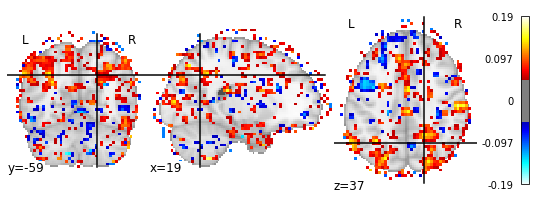

In [80]:
from nilearn import plotting 
plotting.plot_stat_map(r_maps.corrs_image_, threshold=0.05)

In [86]:
from numpy import column_stack as cstack
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from nilearn.image import new_img_like
from tqdm import tqdm

In [82]:
X = image.load_img(copes_stroop)

In [84]:
X_data = X.get_fdata()
        
mask = np.ones(X.shape[:3], dtype=bool)
        
X_masked = X_data[mask].T # Time Points x Voxels

In [85]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
linReg = LinearRegression()

In [90]:
y_pred_voxels = np.column_stack([cross_val_predict(linReg, x[:,None], y, cv=cv) for x in tqdm(X_masked.T)])

100%|██████████| 289445/289445 [15:11<00:00, 317.39it/s]


In [134]:
np.argmax(X_masked.mean(0))

69509

In [ ]:
r_maps

In [186]:
#r_maps.y_pred_voxels_[:, 69509]

In [136]:
x = X_masked[:,69509]

In [138]:
y_pred_1 = cross_val_predict(linReg, x[:,None], y, cv=cv)

In [155]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)

y_pred_2 = []
for train_index, test_index in cv.split(X_masked, y):
    X_train, X_test = X_masked[train_index], X_masked[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    x_train_masked, x_test_masked = X_train[:,69509], X_test[:,69509]
    y_train_masked, y_test_masked = y_train, y_test
    
    linReg.fit(y_train_masked[:,None], x_train_masked[:,None])

    beta_y_on_x = np.squeeze(linReg.coef_.T)
    mu_x = np.mean(x_train_masked[:,None], axis=0)
    mu_y = np.mean(y_train)
    var_x = np.var(x_train_masked[:,None], axis=0)
    var_y = np.var(y_train)



    beta = (var_y*beta_y_on_x)/var_x
    alpha = mu_y - (mu_x*beta_y_on_x/var_x)*var_y
    
    def func_pred(a, alpha, beta):
        pred = alpha + a*beta
        return pred

    y_pred_fold = func_pred(x_test_masked, alpha, beta)
    y_pred_2.append(y_pred_fold)
                                
y_pred_2 = np.concatenate(y_pred_2)

In [207]:
r2_score(y, y_pred_1)

-0.013565238030418092

In [170]:
np.corrcoef(np.sort(r_maps.y_pred_voxels_[:, 69509]), np.sort(y_pred_1))

array([[1., 1.],
       [1., 1.]])

In [161]:
np.corrcoef(np.sort(y_pred_1), np.sort(y_pred_2))

array([[1., 1.],
       [1., 1.]])

In [147]:
beta_y_on_x[mask_nan]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [92]:
foo_cors = [np.corrcoef(y, y_pred)[0,1] for y_pred in y_pred_voxels.T]
foo_cors = np.array(foo_cors)

In [114]:
foo_cors_image_data = np.zeros(X.shape[:3])
foo_cors_image_data[mask] = foo_cors    

foo_cors_image = new_img_like(X, foo_cors_image_data)


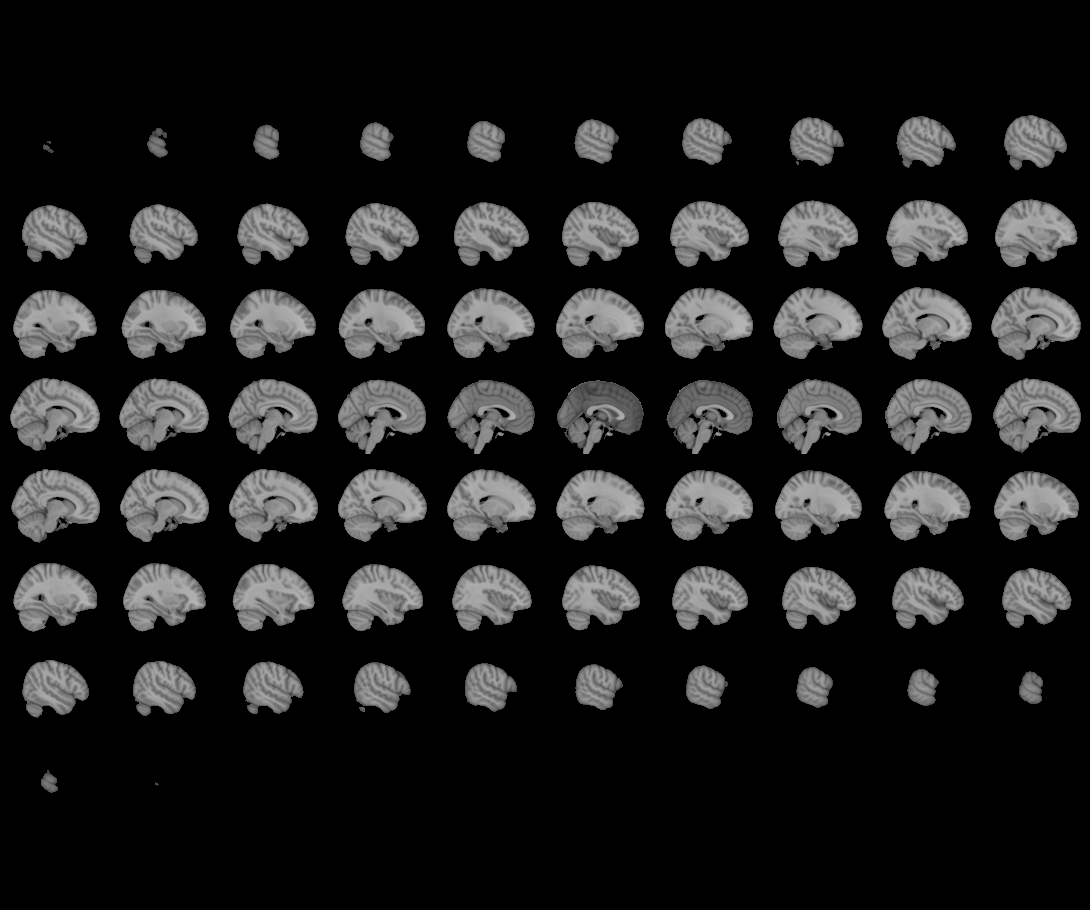
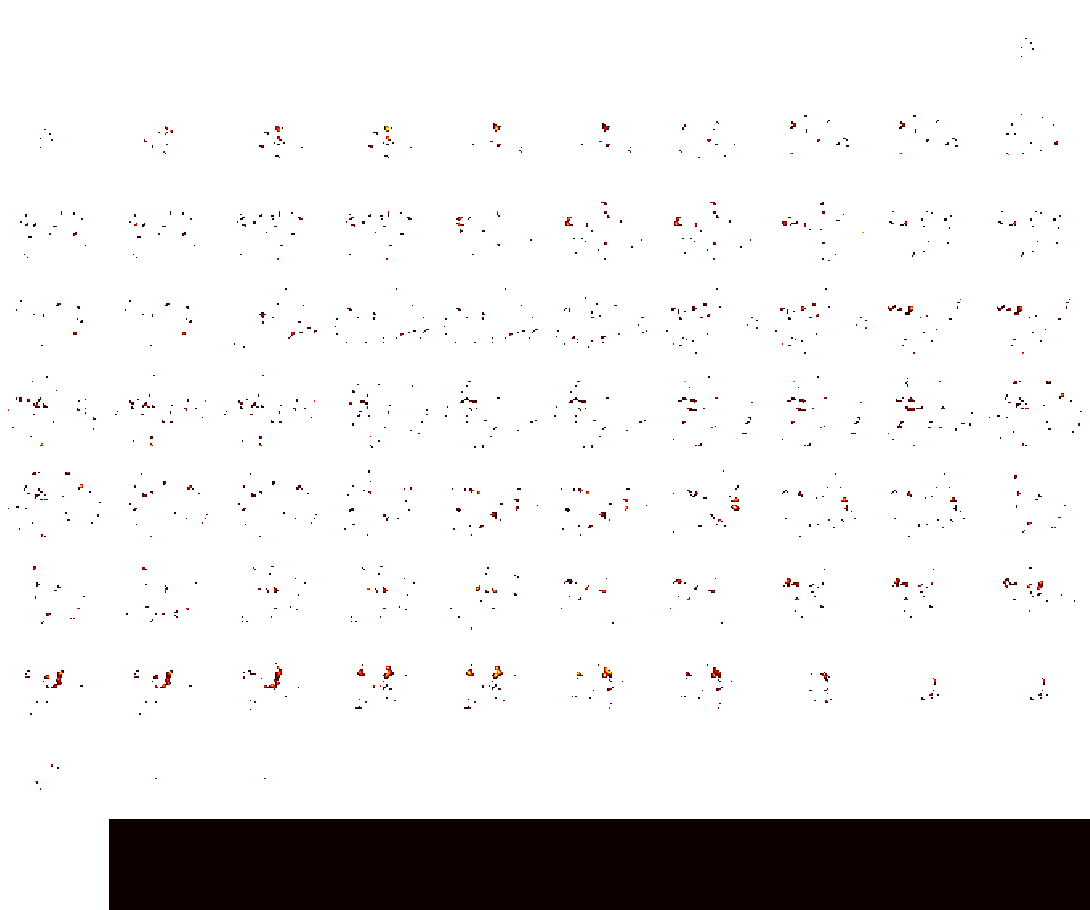

In [208]:
plotting.view_img(r_maps.r2_image_, cut_coords=(19,-59,37), colorbar=True)

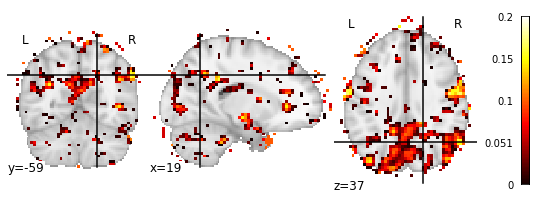

In [205]:
plotting.plot_stat_map(r_maps.corrs_image_, cut_coords=(19,-59,37),  colorbar=True)

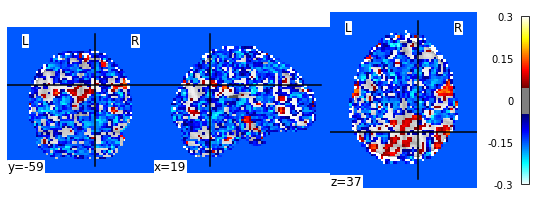

In [119]:
plotting.plot_stat_map(foo_cors_image, cut_coords=(19,-59,37), threshold=0.05)

In [182]:
np.max(r_maps.corrs_image_.get_fdata()[mask])

0.2028939717816893

In [183]:
np.max(foo_cors)

0.2028939717816895

In [99]:
np.corrcoef(r_maps.corrs_image_.get_fdata()[mask],
            foo_cors)

array([[1.        , 0.14234204],
       [0.14234204, 1.        ]])

In [37]:
# Compute correlation and R2 maps
corr_voxels = np.zeros(r_maps.y_pred_voxels_.shape[1])
r2_voxels = np.zeros(r_maps.y_pred_voxels_.shape[1])

t_0 = time.time()
for ix in np.where(mask_zeros)[0]:
    y_pred = r_maps.y_pred_voxels_[:, ix]
    r2_voxels[ix] = r2_score(y, y_pred)
    corr_voxels[ix] = np.corrcoef(y, y_pred)[0,1]
t_f = time.time()
print(" ellapsed time = %f" % (t_f-t_0))

 ellapsed time = 18.653501


In [9]:
#corr_maps = CorrelationMaps()
#r2_map = R2Maps()

In [10]:
#r2_map.fit(copes_stroop, y)

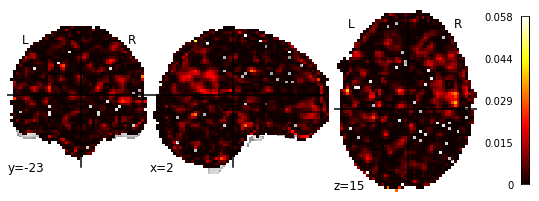

In [14]:
plotting.plot_stat_map(r2_map.pred_map_)

In [13]:
import matplotlib.pylab as plt
from nilearn import plotting

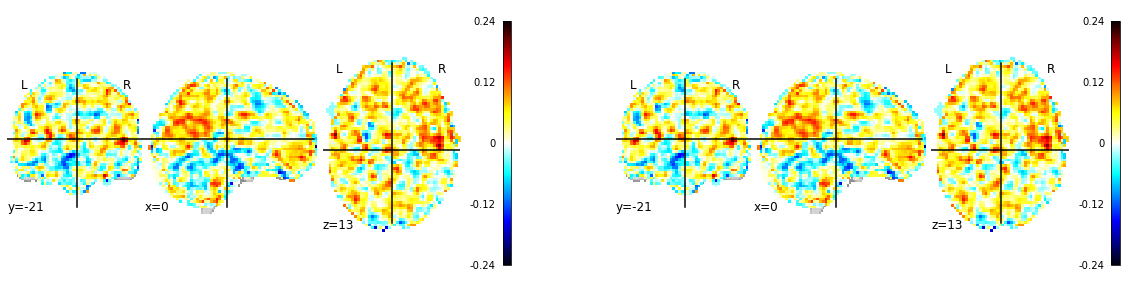

In [103]:
fig, axs = plt.subplots(ncols=2, figsize=(20,5))
plotting.plot_stat_map(corr_maps.corrs_img_, 
                       cmap=plotting.cm.cold_white_hot, 
                       colorbar=True,axes=axs[0])

plotting.plot_stat_map(corr_maps.corrs_img_, 
                       cmap=plotting.cm.cold_white_hot, 
                       colorbar=True,axes=axs[1])

In [80]:
plotting.plot_glass_brain(corr_maps.corrs_img_, 
                          cmap=plotting.cm.cold_white_hot, colorbar=True, plot_abs=False)

(array([48]), array([39]), array([37]))

In [99]:
cols_y = ['mavgimt','mmaximt','mavgcca','mmaxcca',
          'mavgccaf','mmaxccaf', 'mavgiaf','mmaxiaf',
          'mavgbulbf', 'mmaxbulbf', 'mavgbulb','mmaxbulb','mavgica','mmaxica']

<ipython-input-67-72171b55ec01>:33: RuntimeWarning: invalid value encountered in true_divide
  corrs_data = num/den


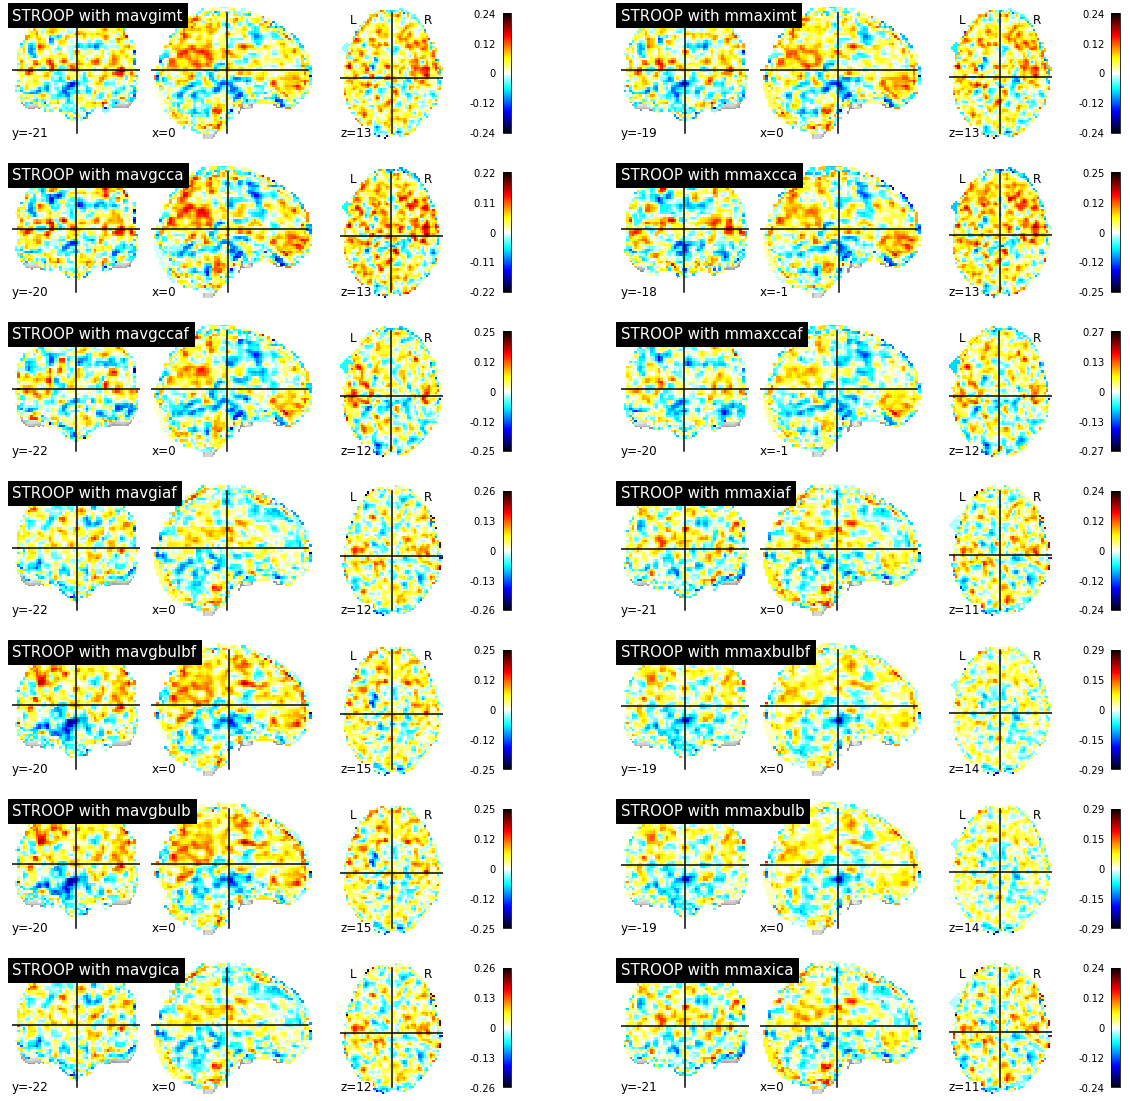

In [107]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(20,20))

axs=axs.flatten()
for ii, column in enumerate(cols_y):
    y = Y_df.loc[:, column].to_numpy()
    
    corr_maps.fit(copes_stroop, y)
    
    plotting.plot_stat_map(corr_maps.corrs_img_, 
                           cmap=plotting.cm.cold_white_hot, 
                           colorbar=True,
                           axes=axs[ii], title="STROOP with %s" % column)

In [17]:
from nilearn.signal import clean
import numpy as np
import pandas as pd

from nilearn.glm.first_level import make_first_level_design_matrix

n_scans=280
start_time = 0
end_time = (n_scans - 1)* 2.0
frame_times = np.linspace(start_time, end_time, n_scans)
#frame_times

,onset,duration,trial_type
0,10,60,Incongruent
1,80,60,Congruent
2,150,60,Incongruent
3,220,60,Congruent
4,290,60,Incongruent
5,360,60,Congruent
6,430,60,Incongruent
7,500,60,Congruent


In [24]:
m = np.array([[1,2,3],[4,5,6],[7,8,9]])
c = np.array([0,1,2])

In [27]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [26]:
m*c[:, None]

array([[ 0,  0,  0],
       [ 4,  5,  6],
       [14, 16, 18]])

In [89]:
corr_maps.corrs_img_.get_fdata().min()

-0.21099964871085977

In [86]:
np.where(corr_maps.corrs_img_.get_fdata()==corr_maps.corrs_img_.get_fdata().min())

(array([19]), array([64]), array([29]))

In [74]:
plotting.plot_glass_brain(corr_maps.corrs_img_, 
                          cmap=plotting.cm.cold_white_hot, colorbar=True, plot_abs=False)

<module 'nilearn.plotting.cm' from '/home/javi/anaconda3/lib/python3.8/site-packages/nilearn/plotting/cm.py'>

In [36]:
np.corrcoef([1], [4])

/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/javi/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [110]:
foo = image.load_img(copes_stroop)

In [116]:
from nilearn.masking import apply_mask

In [142]:
mask = np.ones(foo.get_fdata().shape[:3], dtype=bool)

masked_data = foo.get_fdata()[mask]

back_data = np.zeros(foo.get_fdata().shape[:3])

data = foo.get_fdata()[:,:,:,0]
back_data[mask] = masked_data[:,0]

In [152]:
masked_data.shape

(289445, 319)

In [151]:
len([len(x) for x in masked_data])

289445

In [147]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector x that approximatively solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`|| b - a x ||`.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values of `a`.
    For the purposes of rank determination, singular values are treated
    as zero if they ar

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature

In [44]:
linReg = linear_model.LinearRegression()

In [45]:
linReg.fit(diabetes_y[:,None], diabetes_X) 

LinearRegression()

In [46]:
foo_normal = np.linalg.pinv(np.column_stack((linReg.intercept_, linReg.coef_)))

In [47]:
foo_invert = np.array([linReg.fit(x[:, None], diabetes_y).coef_  for x in diabetes_X.T])

In [48]:
foo

array([[ 304.18307453],
       [  69.71535568],
       [ 949.43526038],
       [ 714.7416437 ],
       [ 343.25445189],
       [ 281.78459335],
       [-639.14527932],
       [ 696.88303009],
       [ 916.13872282],
       [ 619.22282068]])

In [34]:
np.linalg.pinv(np.column_stack((linReg.intercept_, linReg.coef_))).shape

(2, 1)

In [51]:
1/foo_normal[1,:]

array([111.00935203, 484.35765226,  35.56552765,  47.24387658,
        98.37357044, 119.83325845, -52.83175374,  48.45456776,
        36.8581364 ,  54.53152706])

In [61]:
final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")

In [100]:
from nilearn.masking import apply_mask
from tqdm import tqdm
mask = "../data/grey_mask_motion_035.nii.gz"
thr = 2
stats_stroop = []
stats_msit = []
for subj in tqdm(final_subjects):
    a = apply_mask(image.load_img("../task-stroop/first-level-nilearn/node/sub-%d/zstat_inc_con.nii.gz" % subj), mask, ensure_finite=False)
    b = apply_mask(image.load_img("../task-msit/first-level-nilearn/node/sub-%d/zstat_inc_con.nii.gz" % subj), mask, ensure_finite=False)
    
    stats_stroop.append(a)
    stats_msit.append(b)

100%|██████████| 259/259 [07:08<00:00,  1.66s/it]


In [104]:
from scipy.spatial.distance import dice, jaccard
thr = 2 
d_stroop_msit = []
for a,b in zip(stats_stroop,stats_msit):
    d_stroop_msit.append(dice(a>thr,b>thr))

In [105]:
d_stroop_msit

[0.825027246606559,
 0.9649334945586457,
 0.9100413323608072,
 0.8412768787408557,
 0.7929442795911639,
 0.832468495181616,
 0.9492507492507493,
 0.7732596685082873,
 0.9211934001356137,
 0.7837991473235434,
 0.9051773184145647,
 0.9496937312654763,
 0.9233870967741935,
 0.9624530663329162,
 0.7843594981032973,
 0.8490836197021764,
 0.8081271005194012,
 0.871375856615709,
 0.7756993452937675,
 0.8880136257185437,
 0.9089511647156202,
 0.9509299564701227,
 0.9566412213740458,
 0.7906592108372056,
 0.7798720969370583,
 0.8274682306940372,
 0.9280290524925718,
 0.7066732656933102,
 0.7108794788273616,
 0.8004822182037372,
 0.9443826473859844,
 0.7423250400116398,
 0.8864027538726333,
 0.6131383837965456,
 0.9684156902699949,
 0.8013256897169473,
 0.6157706834997672,
 0.945994277539342,
 0.9162798408488063,
 0.8227187304238881,
 0.9618482407799915,
 0.8661678697507772,
 0.9644580250884529,
 0.9724503311258278,
 0.8981437410756783,
 0.6072441838471723,
 0.9095905468535311,
 0.79521076129181